In [15]:
%load_ext autoreload
%load_ext memory_profiler
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn enhances the aesthetics of matplotlib plots
import pandas as pd
import xarray as xr

from tempest import casestudy
from tempest import grid
from tempest import storm_tracker
from tempest import joint_distrib
from tempest import handler
from tempest.plots.hist import simple_hist
settings_path = 'settings/tropics_20d.yaml'

In [17]:
## Load handler and pass settings
hdlr = handler.Handler(settings_path)

## Initiate variables
cs = casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False)

## Make grid and load data on grid 
gr = grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False)

## Get ocean mask 
lm = gr.get_landmask()
ocean = lm.Landmask == 0
ocean = ocean.values[:,:,np.newaxis]

## Load storms conv mcs here
st = storm_tracker.StormTracker(gr, label_var_id = "Conv_MCS_label", overwrite = False)

##
jd = joint_distrib.JointDistribution(gr, st, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_50_Prec", nd=5, overwrite = True, dist_mask = ocean)

Data loaded from /scratchx/mcarenso/tempest/DYAMOND_SAM_post_20_days_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /scratchx/mcarenso/tempest/DYAMOND_SAM_post_20_days_Tropics/grid_attributes.pkl instead of computing
Loading storms...
loading storms from netcdf
Time elapsed for loading storms: 1.38 seconds
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Time elapsed for propagating all labels: 4.95 seconds


# Bin fraction of convective MCS

## Convective MCS only 

In [18]:
## Load storms that are in convective phase
st = storm_tracker.StormTracker(gr, label_var_id = "Conv_MCS_label", overwrite = False)
jd = joint_distrib.JointDistribution(gr, st, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_50_Prec", nd=5, overwrite = True, dist_mask = ocean)

Loading storms...
loading storms from netcdf
Time elapsed for loading storms: 0.53 seconds
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Time elapsed for propagating all labels: 4.90 seconds


/home/mcarenso/code/tempest/tempest/joint_distrib.py:718: RuntimeWarning: invalid value encountered in scalar divide
  bin_fraction_mcs[i_bin,j_bin] = count_bin_mcs/count_bin


(<AxesSubplot:xlabel='mean_unweighted_Prec', ylabel='cond_alpha_50_Prec'>,
 <matplotlib.colorbar.Colorbar at 0x14face925dc0>)

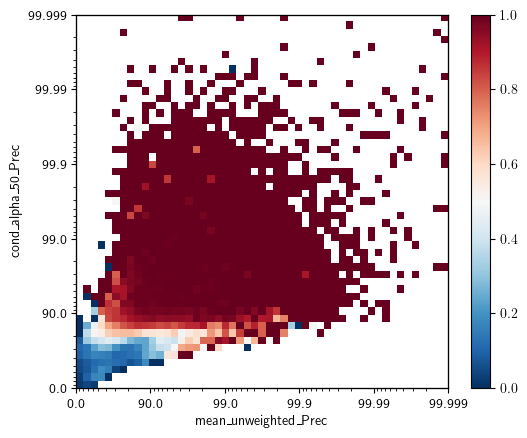

In [19]:
%matplotlib inline
data, noise, count = jd.get_mcs_bin_fraction(region_mask = None, bin_noise_treshold= 0)
jd.plot_data(data, noise, vbds = (0,1))

In [6]:
conv_mcs = gr.get_var_id_ds("Conv_MCS_label")
conv_mcs
# THIS BUILDS ALL THE VAR FROM REL_SURFACE BY SUPPRESING MCS DIMENSION

# ds_mcs = gr.get_var_id_ds("Conv_MCS_label").sortby("days")
# ds_mcs["MCS_rel_occupation"] = ds_mcs["Rel_surface"].sum(dim='MCS')
# ds_mcs["max_MCS_rel_surf"] = ds_mcs["Rel_surface"].max(dim='MCS')
# weights = ds_mcs["Rel_surface"]
# square_weights =weights**2 
# root_weights = np.sqrt(weights)
# ds_mcs["avg_MCS_rel_surf"] = ds_mcs["Rel_surface"].mean(dim ='MCS')
# ds_mcs["root_weight_avg_MCS_rel_surf"] = ((ds_mcs["Rel_surface"] * root_weights).sum(dim ='MCS')) / root_weights.sum(dim='MCS')
# ds_mcs["square_weight_avg_MCS_rel_surf"] = ((ds_mcs["Rel_surface"] * square_weights).sum(dim ='MCS')) / square_weights.sum(dim='MCS')
# ds_mcs["weight_avg_MCS_rel_surf"] = ((ds_mcs["Rel_surface"] * weights).sum(dim ='MCS')) / weights.sum(dim='MCS')

# import os 
# file_mcs_ds = gr.get_var_ds_file("Conv_MCS_label")
# os.remove(file_mcs_ds)
# ds_mcs.to_netcdf(file_mcs_ds)

# ds_mcs.Conv_Rel_surface[30, 120, 10].values
# ds_mcs.MCS_rel_occupation[30, 120, 10].values
# ds_mcs.max_MCS_rel_surf[30, 120, 10]

<xarray.Dataset>
Dimensions:                         (lat_global: 60, lon_global: 360, days: 20,
                                     MCS: 300)
Coordinates:
  * lat_global                      (lat_global) float64 -29.5 -28.5 ... 29.5
  * lon_global                      (lon_global) float64 0.5 1.5 ... 358.5 359.5
  * days                            (days) object '16-08-21' ... '16-09-09'
  * MCS                             (MCS) int64 0 1 2 3 4 ... 296 297 298 299
Data variables: (12/18)
    global_pixel_surf               (lat_global, lon_global, days) float64 ...
    Conv_MCS_label                  (lat_global, lon_global, days, MCS) float64 ...
    Rel_surface                     (lat_global, lon_global, days, MCS) float64 ...
    MCS_rel_occupation              (lat_global, lon_global, days) float64 ...
    max_MCS_rel_surf                (lat_global, lon_global, days) float64 ...
    avg_MCS_rel_surf                (lat_global, lon_global, days) float64 ...
    ...                              ...
    growth_rate_surf_adj            (lat_global, lon_global, days) float64 ...
    norm_growth_rate_surf_adj       (lat_global, lon_global, days) float64 ...
    s_max_surf_adj                  (lat_global, lon_global, days) float64 ...
    growth_rate_surf_fro_adj        (lat_global, lon_global, days) float64 ...
    norm_growth_rate_surf_fro_adj   (lat_global, lon_global, days) float64 ...
    s_max_surf_fro_adj              (lat_global, lon_global, days) float64 ...

## MCS relative occupation has a clear scaling with mean_precip, kinda similar behavior than precip, Maybe add that into rain morphology subsection

/home/mcarenso/code/tempest/tempest/joint_distrib.py:919: RuntimeWarning: invalid value encountered in divide
  self.plot_data(bincount/bincount_reduced_prec, scale = 'linear',  cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = label)


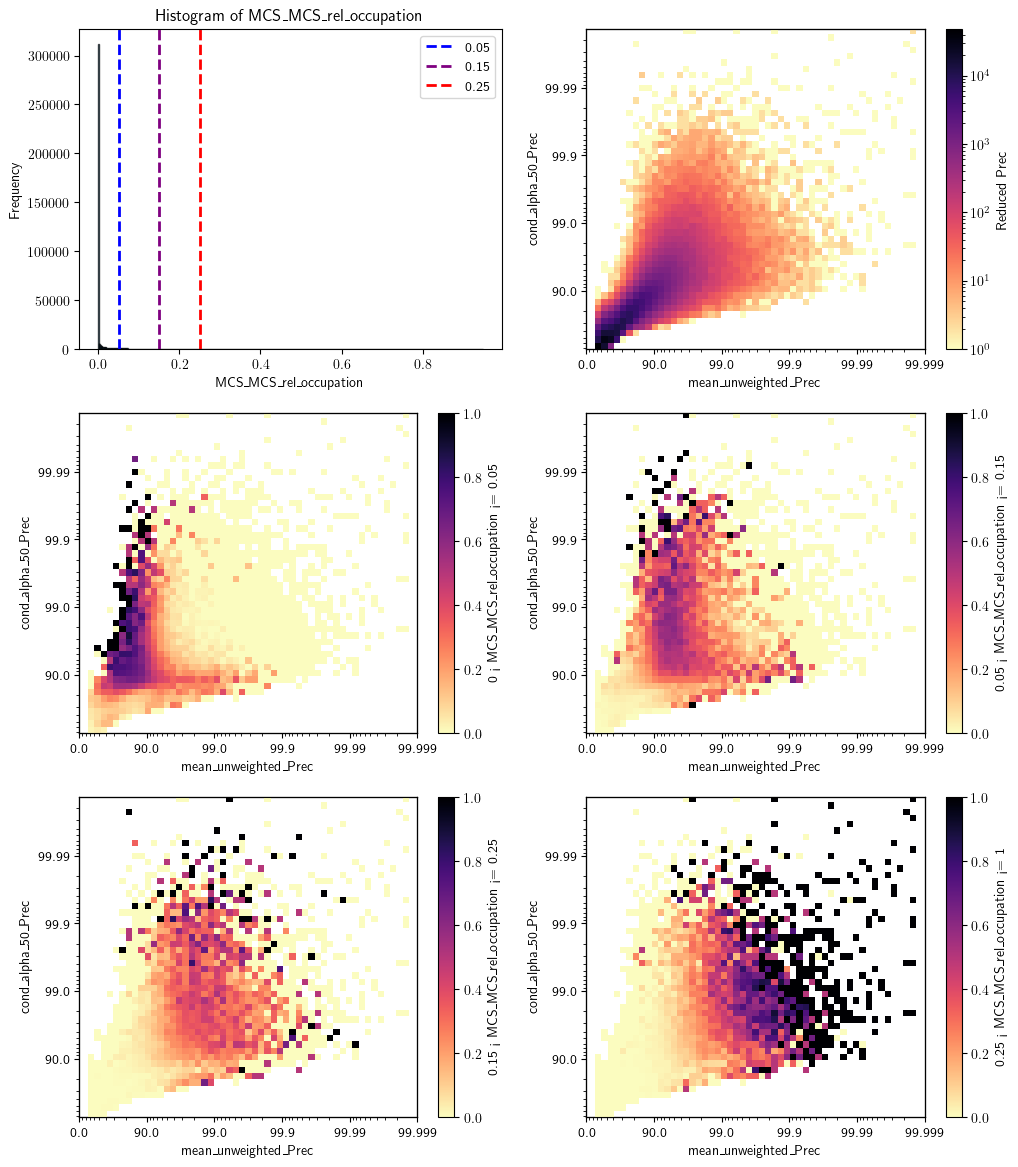

In [21]:
%matplotlib inline
var = "MCS_rel_occupation"
var_cond_list = [0, 0.05, 0.15, 0.25, 1]
cond, tot = jd.process_plot_var_cond_reducing_prec(var_id = var, var_cond_list = var_cond_list, mask = True, func = "MCS")

/home/mcarenso/code/tempest/tempest/joint_distrib.py:919: RuntimeWarning: invalid value encountered in divide
  self.plot_data(bincount/bincount_reduced_prec, scale = 'linear',  cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = label)


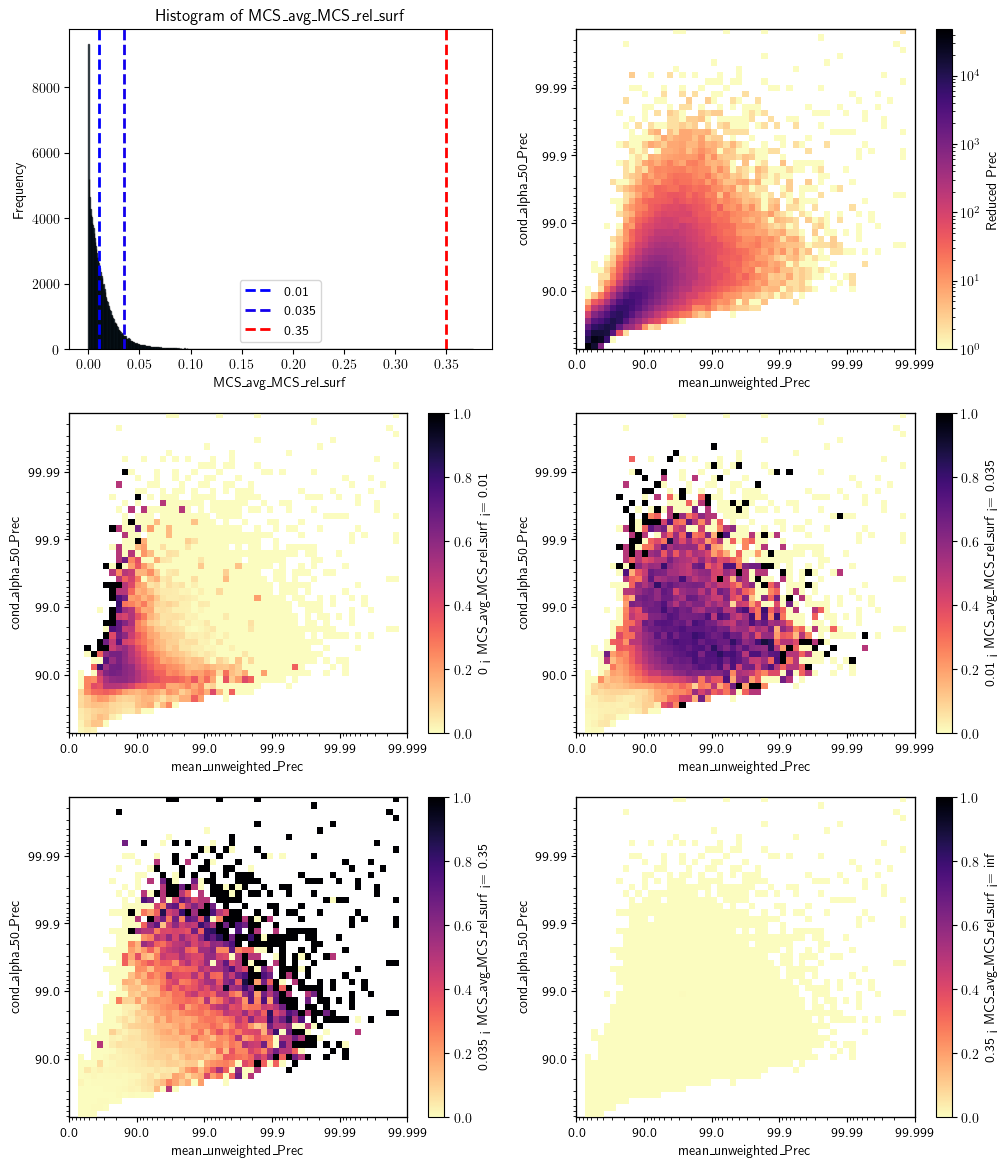

In [25]:
%matplotlib inline
var = "avg_MCS_rel_surf"
var_cond_list = [0, 0.01,  0.035, 0.35, np.inf]
cond, tot = jd.process_plot_var_cond_reducing_prec(var_id = var, var_cond_list = var_cond_list, mask = True, func = "MCS")

## propagate growth rate to grid with conv_mcs

In [9]:
# jd.add_mcs_var_from_labels("growth_rate") # 14min
# ds_mcs

/home/mcarenso/code/tempest/tempest/plots/hist.py:28: RuntimeWarning: invalid value encountered in scalar divide
  cf = (bar - min_bar)/(max_bar - min_bar)
/home/mcarenso/code/tempest/tempest/joint_distrib.py:919: RuntimeWarning: invalid value encountered in divide
  self.plot_data(bincount/bincount_reduced_prec, scale = 'linear',  cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = label)


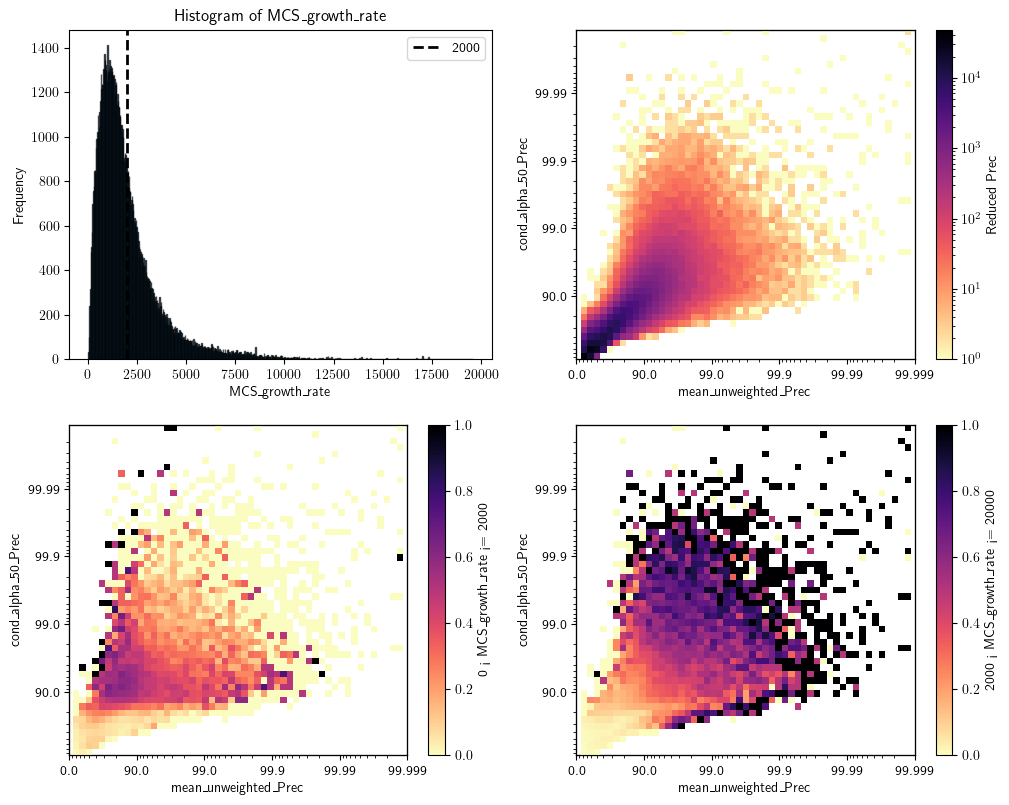

In [26]:
%matplotlib inline
var = "growth_rate"
var_cond_list = [0, 2000, 20000]
cond, tot = jd.process_plot_var_cond_reducing_prec(var_id = var, var_cond_list = var_cond_list, mask = True, func = "MCS")

## Build 1/A dA/dt

In [11]:
# import xarray as xr
# import os 

# output_file_path = st.file_storms  # Specify your desired output file path here
# ds_storms = xr.open_dataset(output_file_path)
# ds_storms['norm_growth_rate'] = ds_storms['growth_rate'] / ds_storms['s_max']
# ds_storms['norm_growth_rate'] = ds_storms['norm_growth_rate'].where((ds_storms['norm_growth_rate'] >= 0) & (ds_storms['norm_growth_rate'] <= 1), np.nan)
# ds_storms['norm_growth_rate'] = ds_storms['norm_growth_rate'].where((ds_storms['norm_growth_rate'] >= 0) & (ds_storms['norm_growth_rate'] <= 1), np.nan)

# os.remove(output_file_path)
# ds_storms.to_netcdf(output_file_path)

In [12]:
# jd.add_mcs_var_from_labels("norm_growth_rate") # 14min
# ds_mcs

In [12]:
# %matplotlib inline
# var = "norm_growth_rate"
# var_cond_list = [0, 0.02, 0.08, 0.12, 0.2, 0.3,  0.4, 0.5,  1]
# cond, tot = jd.process_plot_var_cond_reducing_prec(var_id = var, var_cond_list = var_cond_list, mask = True, func = "MCS")

## s_max because norm_growth_rate by conv_mcs has oppostie tendency than expected..

In [14]:
# jd.add_mcs_var_from_labels("s_max") # 14min

/home/mcarenso/code/tempest/tempest/joint_distrib.py:919: RuntimeWarning: invalid value encountered in divide
  self.plot_data(bincount/bincount_reduced_prec, scale = 'linear',  cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = label)


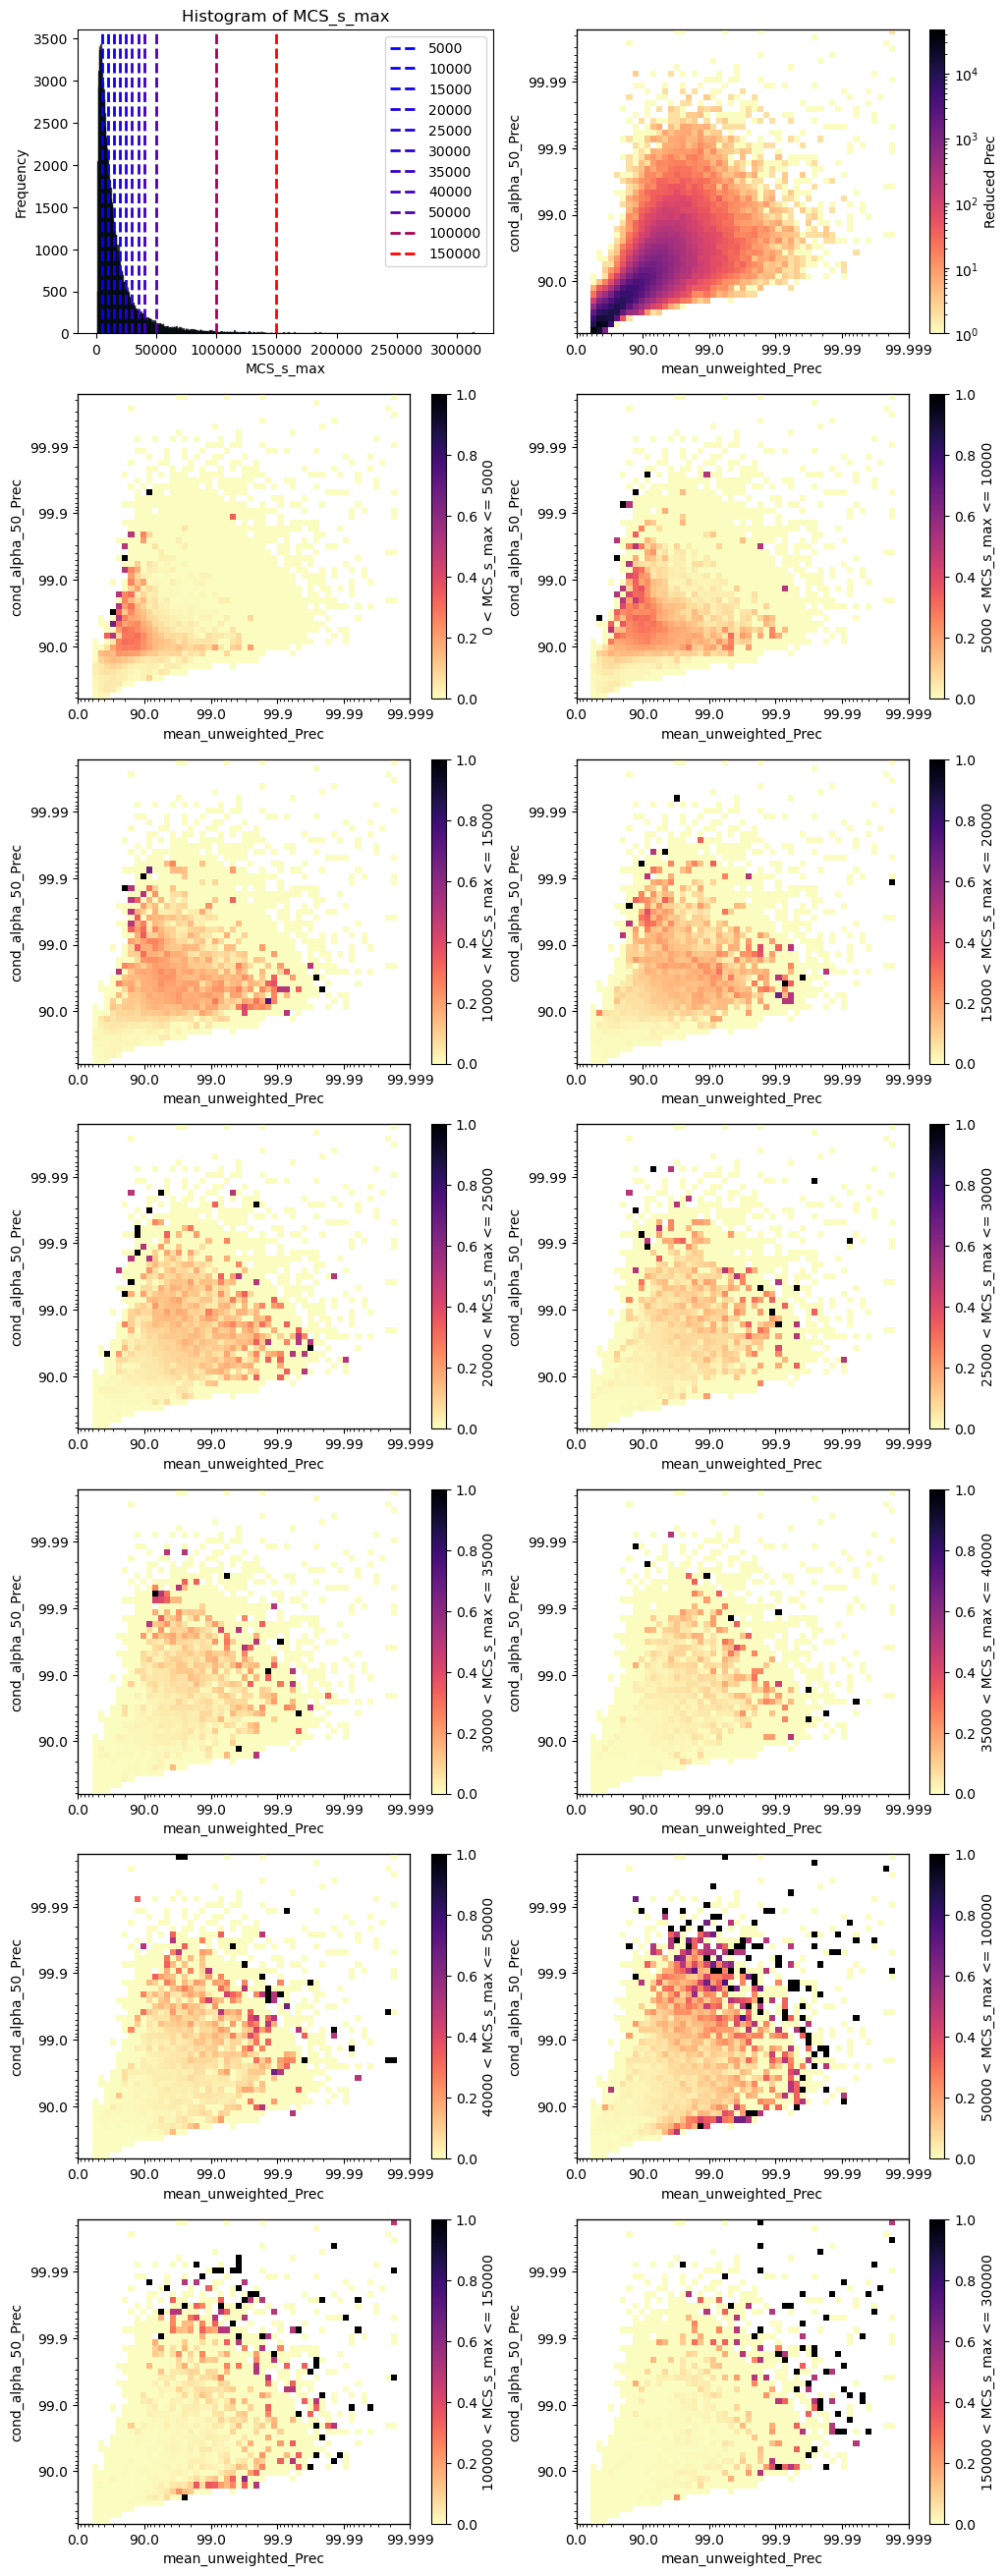

In [15]:
%matplotlib inline
var = "s_max"
var_cond_list = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 50000, 100000, 150000, 300000]
cond, tot = jd.process_plot_var_cond_reducing_prec(var_id = var, var_cond_list = var_cond_list, mask = True, func = "MCS")

In [16]:
path = gr.get_var_ds_file('Conv_MCS_label')
# os.remove(path)
# ds_storms.to_netcdf(path)

## Surface adjsuted as I don't want to see mcs rel_surface signal in every variable 

In [17]:
# jd.add_mcs_var_from_labels("growth_rate", norm_rel_surf = True)
# jd.add_mcs_var_from_labels("norm_growth_rate", norm_rel_surf = True)
# jd.add_mcs_var_from_labels("s_max", norm_rel_surf = True)

/home/mcarenso/code/tempest/tempest/joint_distrib.py:919: RuntimeWarning: invalid value encountered in divide
  self.plot_data(bincount/bincount_reduced_prec, scale = 'linear',  cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = label)


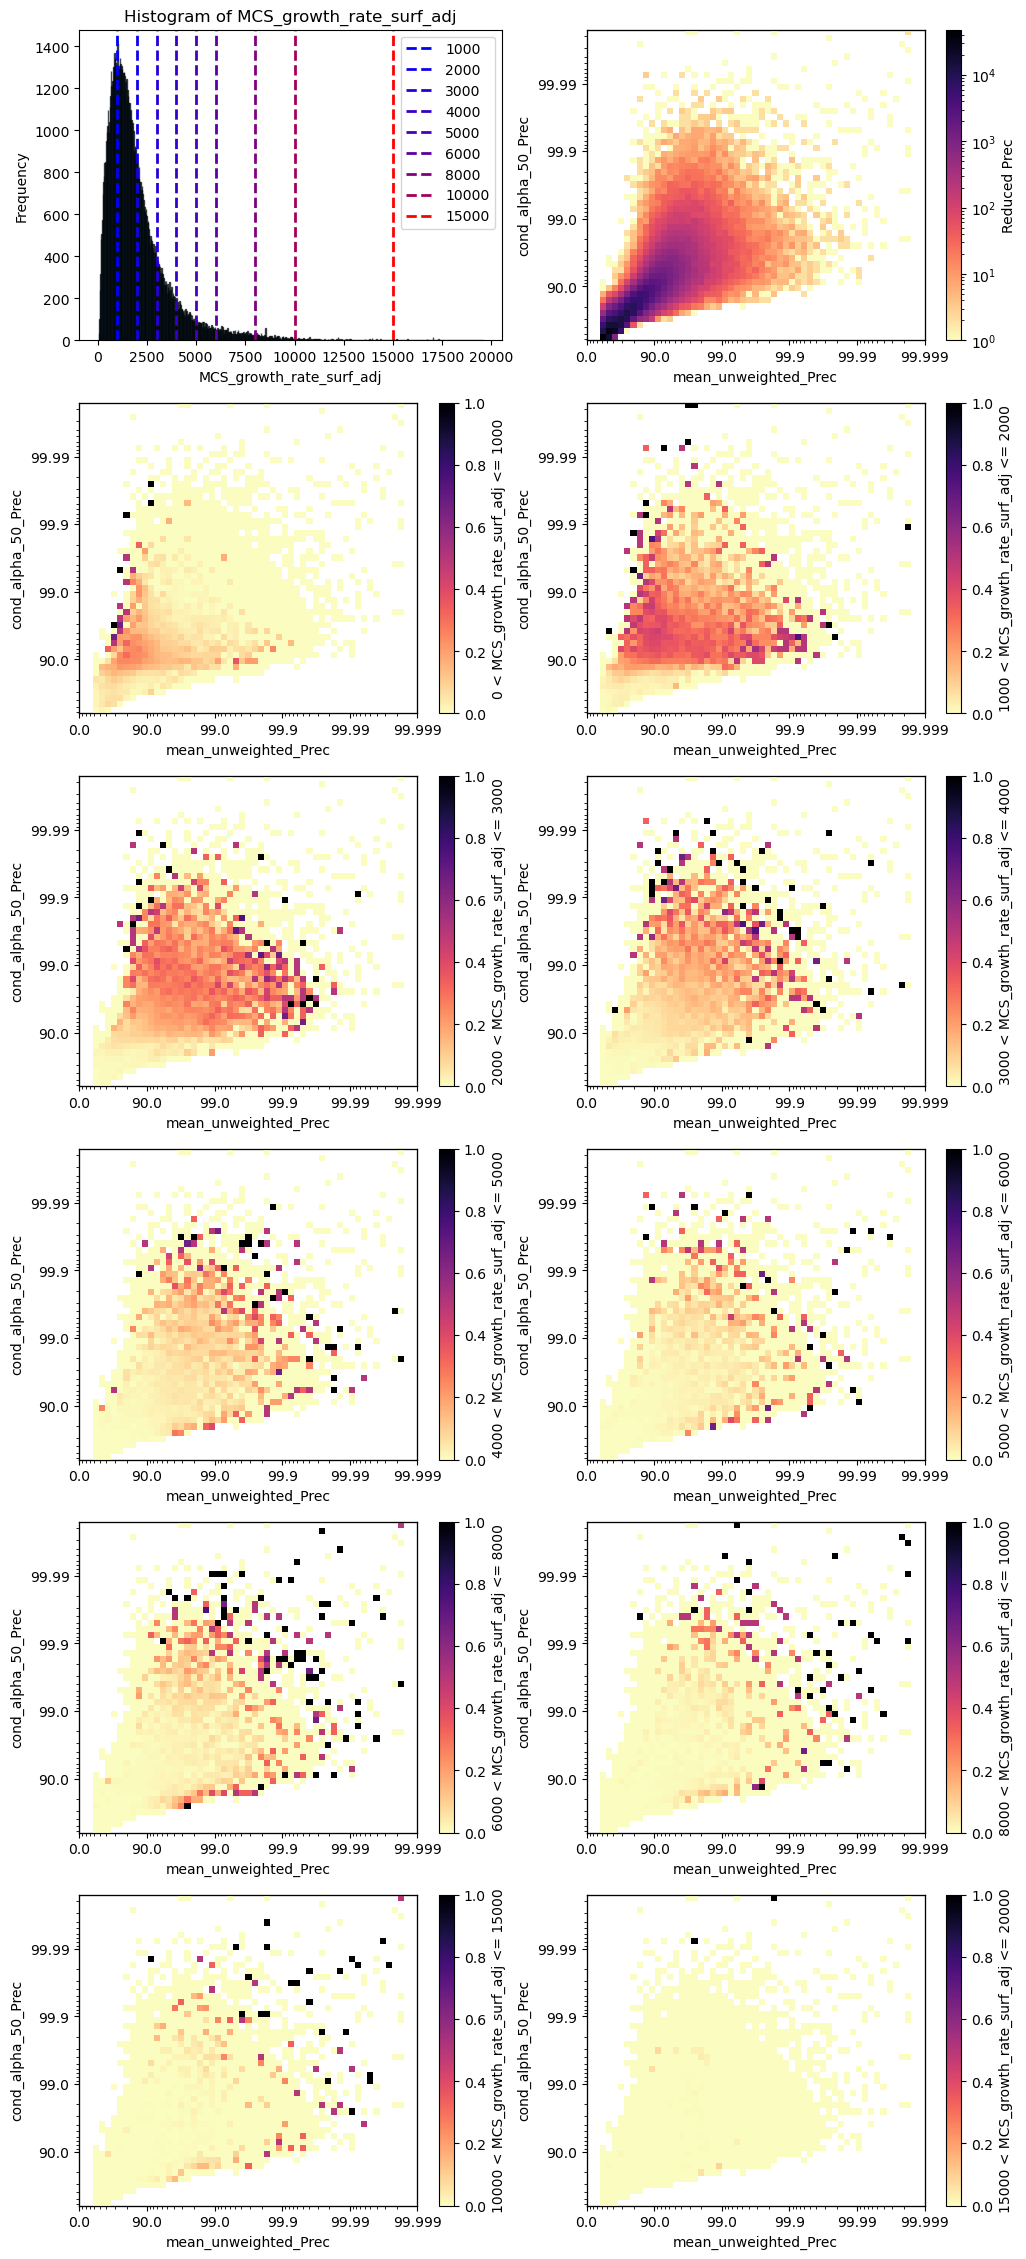

In [18]:
%matplotlib inline
var = "growth_rate_surf_adj"
var_cond_list = [0, 1000, 2000, 3000, 4000, 5000, 6000, 8000, 10000, 15000, 20000]
cond, tot = jd.process_plot_var_cond_reducing_prec(var_id = var, var_cond_list = var_cond_list, mask = True, func = "MCS")


In [11]:
# %matplotlib inline
# var = "norm_growth_rate_surf_adj"
# var_cond_list = [0, 0.08, 0.12, 0.16, 0.24, 0.32,  0.5,  1]
# cond, tot = jd.process_plot_var_cond_reducing_prec(var_id = var, var_cond_list = var_cond_list, mask = True, func = "MCS")

/home/mcarenso/code/tempest/tempest/joint_distrib.py:919: RuntimeWarning: invalid value encountered in divide
  self.plot_data(bincount/bincount_reduced_prec, scale = 'linear',  cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = label)


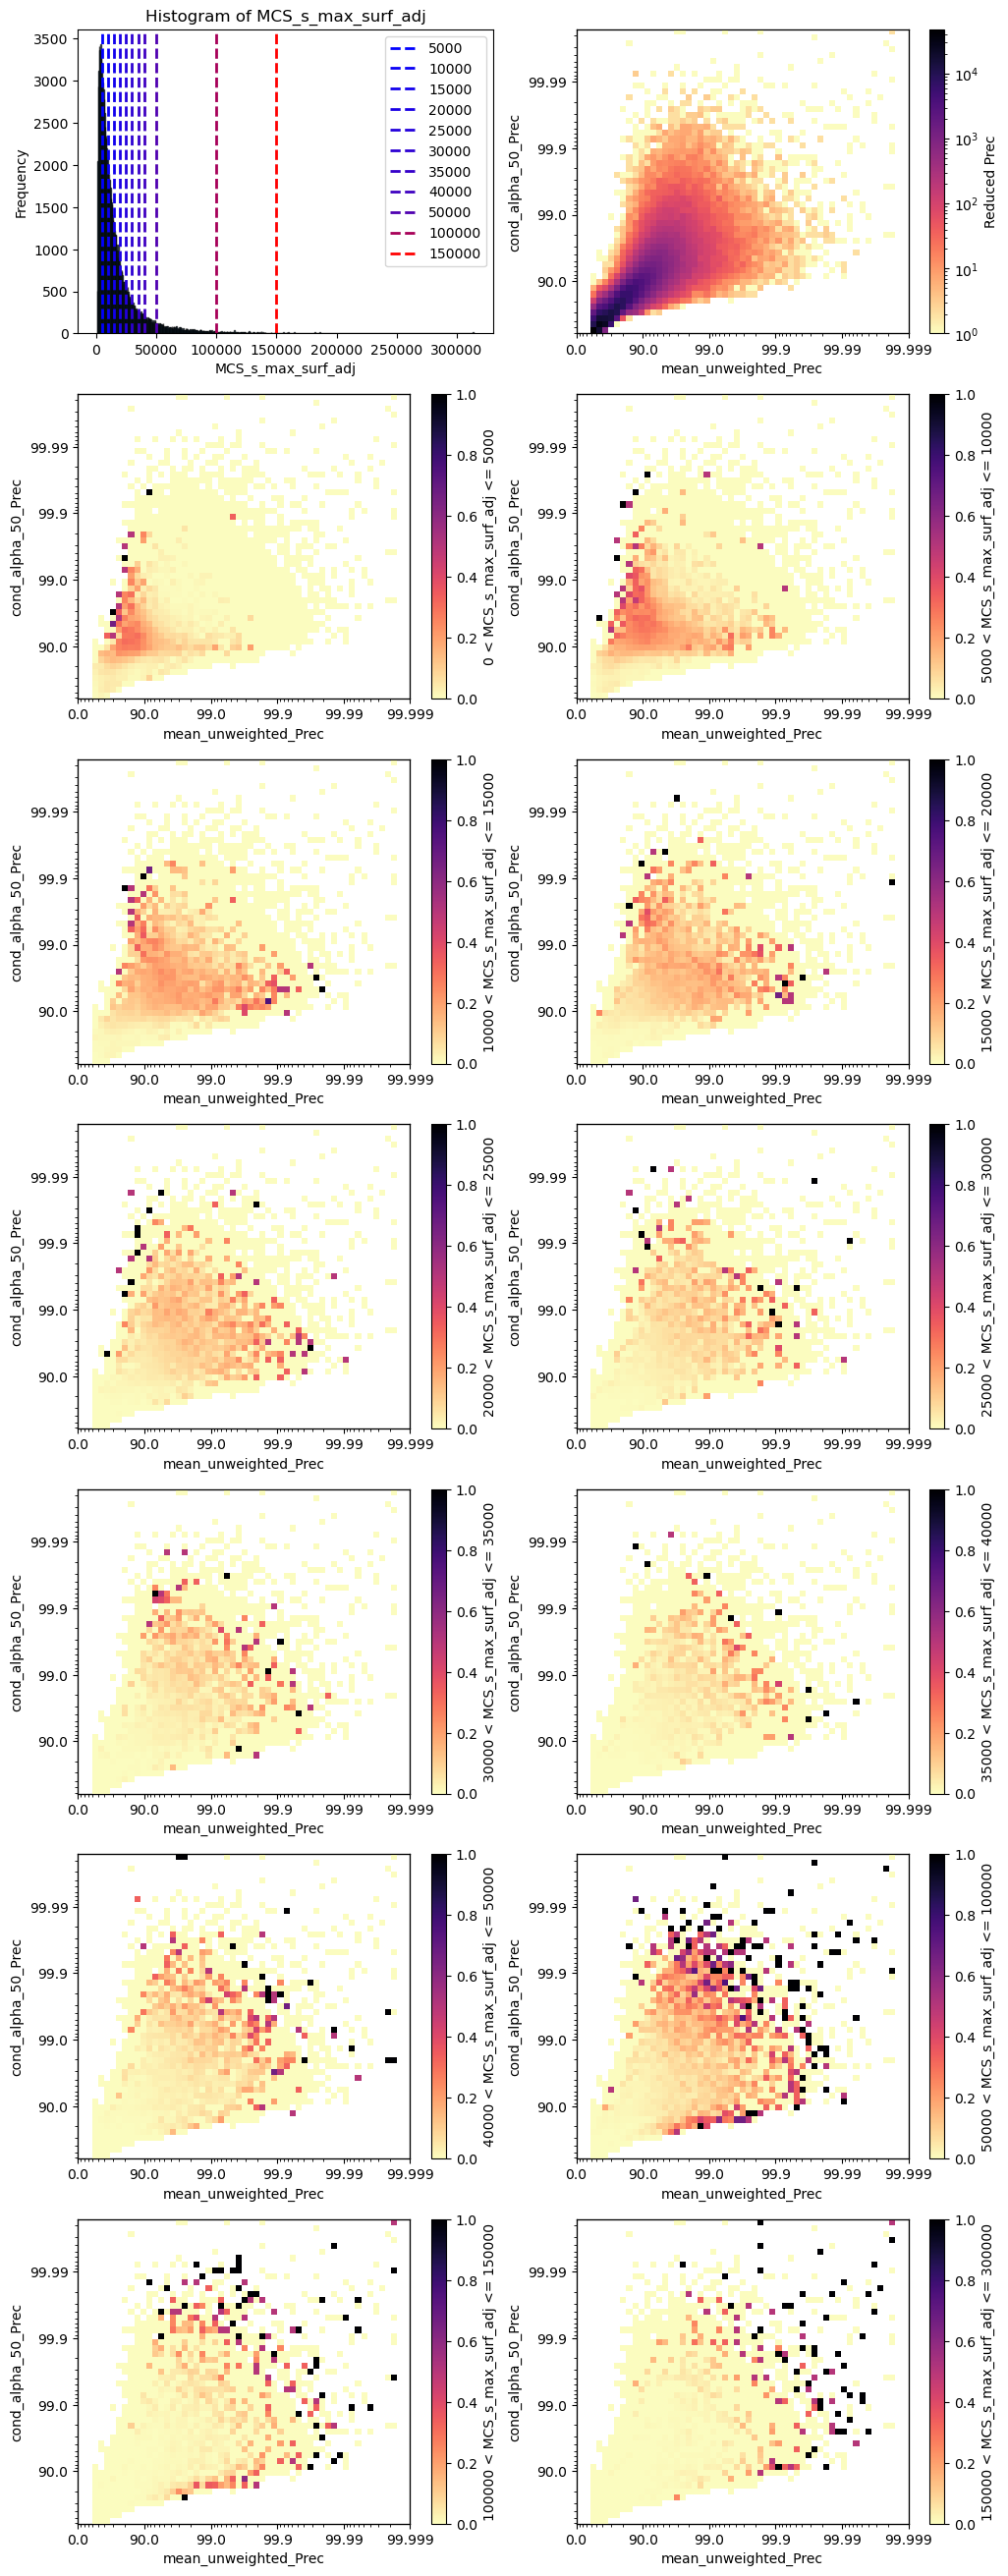

In [20]:
%matplotlib inline
var = "s_max_surf_adj"
var_cond_list = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 50000, 100000, 150000, 300000]
cond, tot = jd.process_plot_var_cond_reducing_prec(var_id = var, var_cond_list = var_cond_list, mask = True, func = "MCS")

## With frobenius norm on rel_surfaces vector but i doubt anywthing will work... 

In [21]:
# jd.add_mcs_var_from_labels("growth_rate", norm_rel_surf = 'fro')
# jd.add_mcs_var_from_labels("norm_growth_rate", norm_rel_surf = 'fro')
# jd.add_mcs_var_from_labels("s_max", norm_rel_surf = 'fro')

/home/mcarenso/code/tempest/tempest/joint_distrib.py:919: RuntimeWarning: invalid value encountered in divide
  self.plot_data(bincount/bincount_reduced_prec, scale = 'linear',  cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = label)


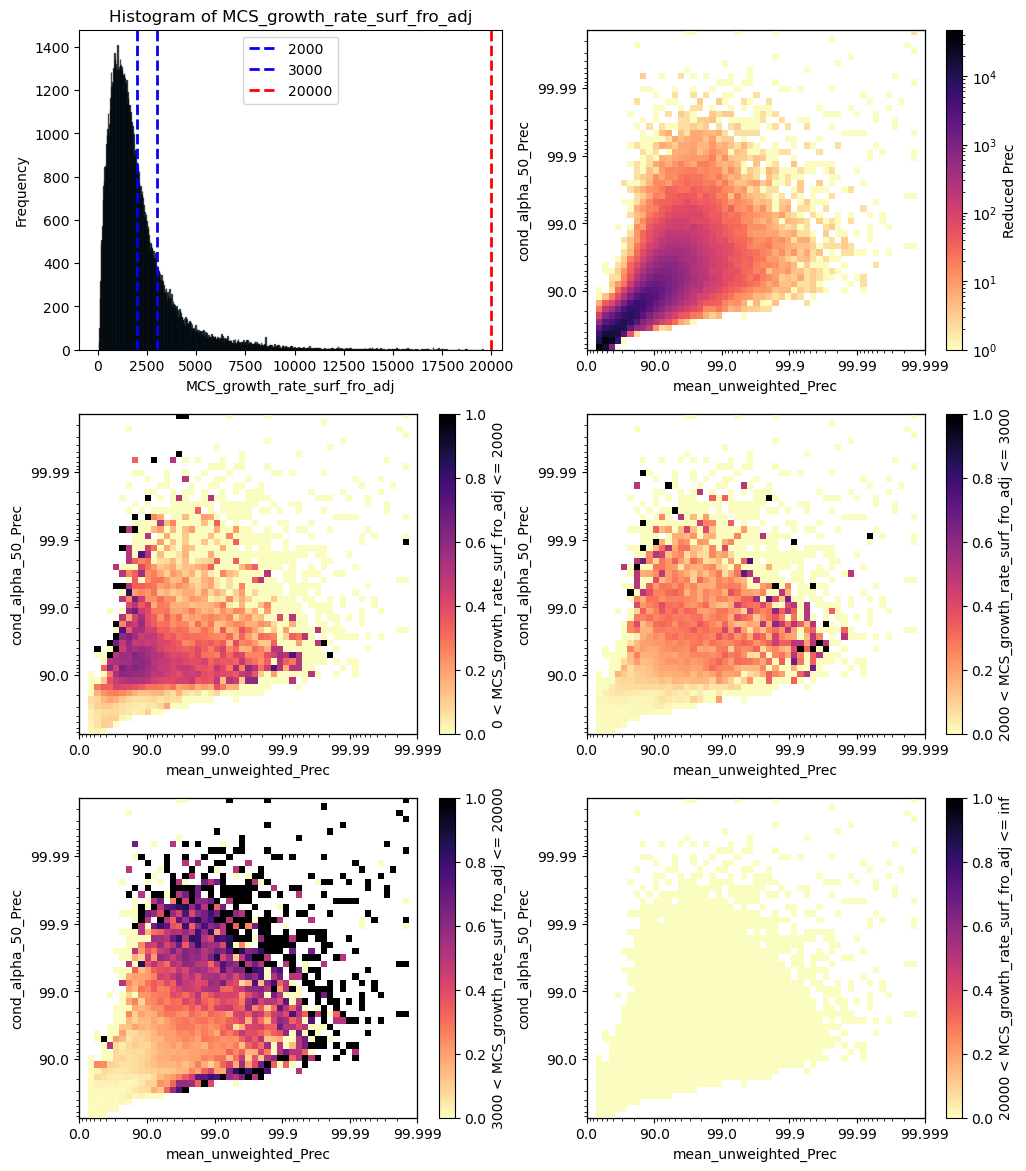

In [27]:
%matplotlib inline
var = "growth_rate_surf_fro_adj"
# var_cond_list = [0, 1000, 2000, 3000, 4000, 5000, 6000, 8000, 10000, 15000, 20000]
var_cond_list = [0, 2000, 3000, 20000, np.inf]
cond, tot = jd.process_plot_var_cond_reducing_prec(var_id = var, var_cond_list = var_cond_list, mask = True, func = "MCS")


In [10]:
# %matplotlib inline
# var = "norm_growth_rate_surf_fro_adj"
# var_cond_list = [0, 0.08, 0.12, 0.16, 0.24, 0.32,  0.5,  1]
# cond, tot = jd.process_plot_var_cond_reducing_prec(var_id = var, var_cond_list = var_cond_list, mask = True, func = "MCS")

/home/mcarenso/code/tempest/tempest/joint_distrib.py:919: RuntimeWarning: invalid value encountered in divide
  self.plot_data(bincount/bincount_reduced_prec, scale = 'linear',  cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = label)


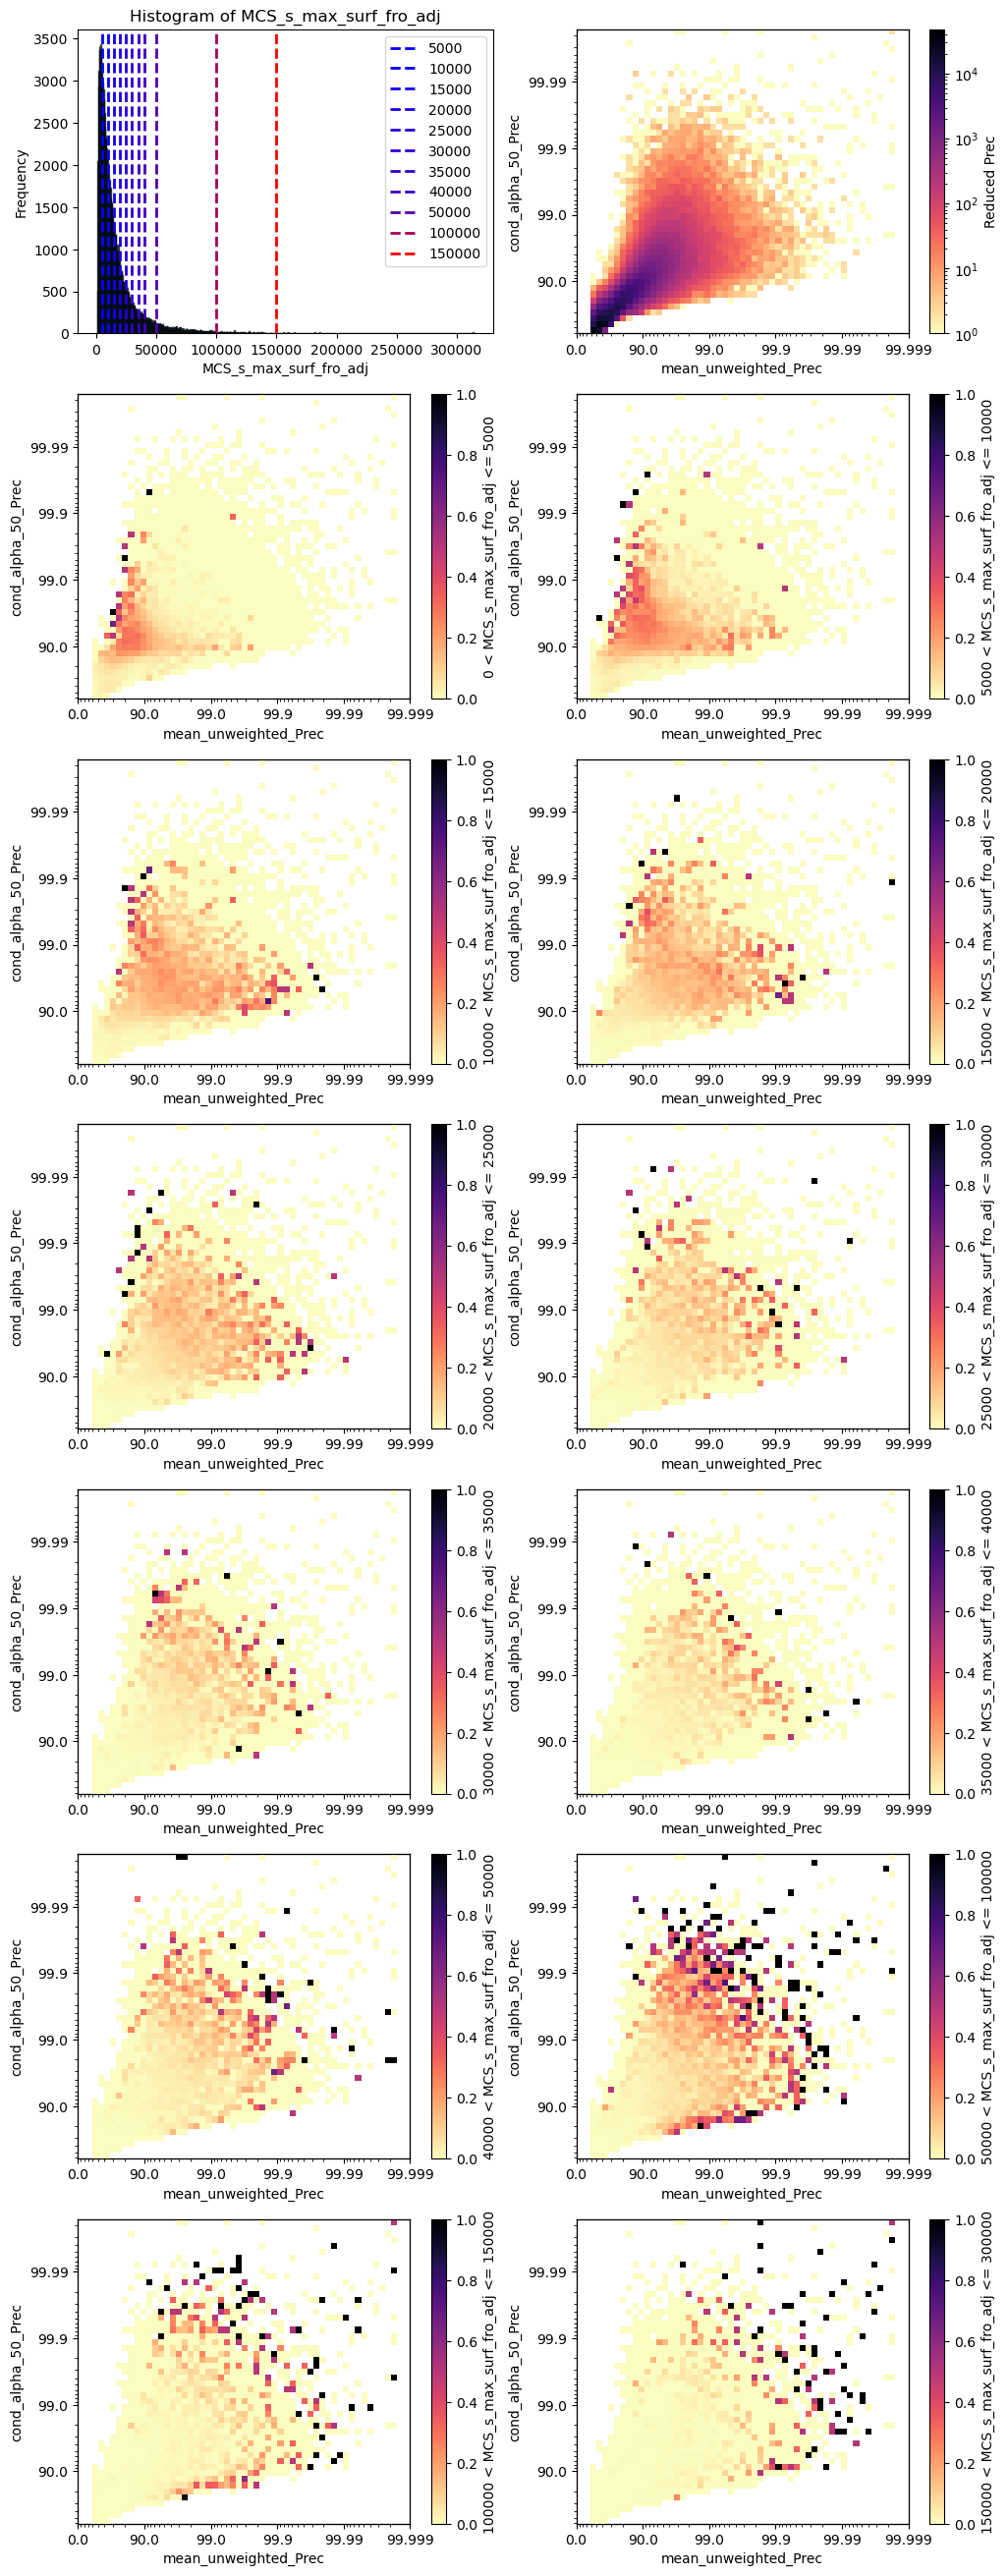

In [24]:
%matplotlib inline
var = "s_max_surf_fro_adj"
var_cond_list = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 50000, 100000, 150000, 300000]
cond, tot = jd.process_plot_var_cond_reducing_prec(var_id = var, var_cond_list = var_cond_list, mask = True, func = "MCS")

## Classic MCS down here

In [ ]:
## Load storms 
st = storm_tracker.StormTracker(gr, label_var_id = "MCS_label", overwrite = False)
jd = joint_distrib.JointDistribution(gr, st, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_50_Prec", nd=5, overwrite = True, dist_mask = ocean)

%matplotlib inline 

data, noise, count = jd.get_mcs_bin_fraction(region_mask = None, bin_noise_treshold= 0)
jd.plot_data(data, noise, vbds = (0,1))

## difference between conv_mcs and mcs (did the code work ? tho it should)

In [ ]:
conv_mcs = gr.get_var_id_ds("Conv_MCS_label")
mcs = gr.get_var_id_ds("MCS_label")
conv_rs = conv_mcs.MCS_rel_occupation
rs = mcs.MCS_rel_occupation

In [ ]:
file = gr.get_var_ds_file("MCS_label")
import os 
os.remove(file)


In [ ]:
mcs.to_netcdf(file)